# import the Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

---
# Pre_processing DATA

In [ ]:
df = pd.read_csv("./House_Data.csv")
df

,Price,Meters,Number of Rooms
0,1.300000e+10,105.0,2.0
1,1.230000e+10,99.0,2.0
2,NaN,NaN,NaN
3,7.000000e+10,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1317,1.170000e+10,130.0,3.0
1318,1.260000e+10,140.0,3.0
1319,NaN,98.0,2.0
1320,1.250000e+10,158.0,3.0


In [3]:
df.dtypes

Price              float64
Meters             float64
Number of Rooms    float64
dtype: object

In [4]:
print('Shape of Training dataset:', df.shape)

print('\ncolumns name:\n', df.columns)

print('\nnumber of Null Values in each column:\n', df.isnull().sum())

Shape of Training dataset: (1322, 3)

columns name:
 Index(['Price', 'Meters', 'Number of Rooms'], dtype='object')

number of Null Values in each column:
 Price              418
Meters             395
Number of Rooms    371
dtype: int64


In [5]:
df.describe()

,Price,Meters,Number of Rooms
count,9.040000e+02,927.000000,951.000000
mean,1.895398e+10,117.540453,2.225026
std,3.290930e+10,143.346460,0.691181
min,6.500000e+01,40.000000,1.000000
25%,9.000000e+09,85.500000,2.000000
50%,1.300000e+10,103.000000,2.000000
75%,1.732900e+10,127.000000,3.000000
max,6.500000e+11,4000.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            904 non-null    float64
 1   Meters           927 non-null    float64
 2   Number of Rooms  951 non-null    float64
dtypes: float64(3)
memory usage: 31.1 KB


In [7]:
# Replace 'NULL' with NaN
df.replace('NULL', np.nan, inplace=True)
df

,Price,Meters,Number of Rooms
0,1.300000e+10,105.0,2.0
1,1.230000e+10,99.0,2.0
2,NaN,NaN,NaN
3,7.000000e+10,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1317,1.170000e+10,130.0,3.0
1318,1.260000e+10,140.0,3.0
1319,NaN,98.0,2.0
1320,1.250000e+10,158.0,3.0


In [8]:
mean_Price = df.loc[:,'Price'].mean(axis=0)
mean_Meter = df.loc[:,'Meters'].mean(axis=0)
mean_Room = df.loc[:,'Number of Rooms'].mean(axis=0)

print("Price Mean: ", mean_Price)
print("Meters Mean: ", mean_Meter)
print("Rooms Mean: ", mean_Room)

Price Mean:  18953981900.03982
Meters Mean:  117.54045307443366
Rooms Mean:  2.2250262881177707


In [9]:
df['Price'] = pd.to_numeric(df['Price'])
df['Meters'] = pd.to_numeric(df['Meters'])
df['Number of Rooms'] = pd.to_numeric(df['Number of Rooms'])

df['Price'].fillna(df['Price'].mean(), inplace=True)
df['Meters'].fillna(df['Meters'].mean() ,inplace=True)
df['Number of Rooms'].fillna(df['Number of Rooms'].mean(), inplace=True)

/tmp/ipykernel_414383/2355965606.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)
/tmp/ipykernel_414383/2355965606.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price            1322 non-null   float64
 1   Meters           1322 non-null   float64
 2   Number of Rooms  1322 non-null   float64
dtypes: float64(3)
memory usage: 31.1 KB


In [11]:
df

,Price,Meters,Number of Rooms
0,1.300000e+10,105.000000,2.000000
1,1.230000e+10,99.000000,2.000000
2,1.895398e+10,117.540453,2.225026
3,7.000000e+10,117.540453,2.225026
4,1.895398e+10,117.540453,2.225026
...,...,...,...
1317,1.170000e+10,130.000000,3.000000
1318,1.260000e+10,140.000000,3.000000
1319,1.895398e+10,98.000000,2.000000
1320,1.250000e+10,158.000000,3.000000


In [12]:
# # Convert columns to numeric types
# df['Price'] = pd.to_numeric(df['Price'])
# df['Meters'] = pd.to_numeric(df['Meters'])
# df['Number of Rooms'] = pd.to_numeric(df['Number of Rooms'])

# # Replace NaN values with 0
# df.fillna(0, inplace=True)

# # Check the DataFrame
# print(df)

# # Check the types of the columns
# print(df.dtypes)


---
# Analysis

<Axes: >

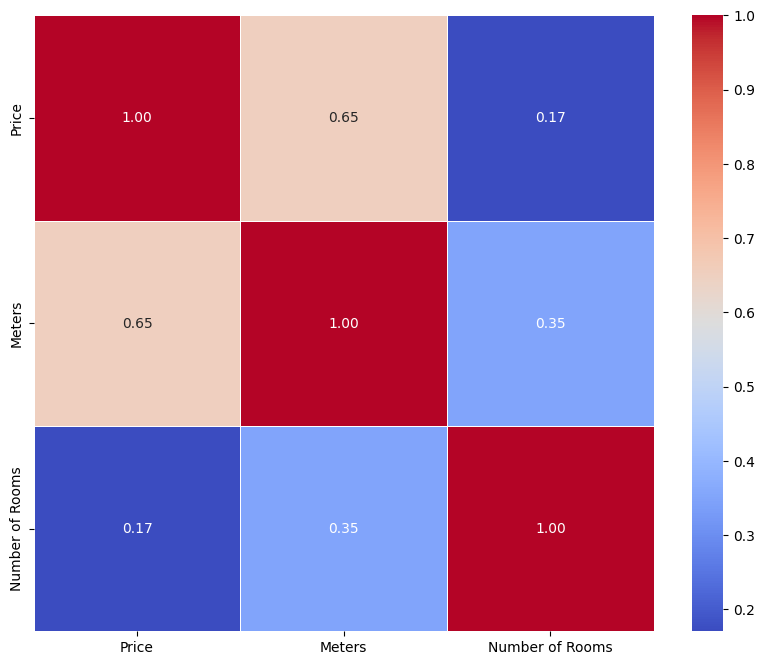

In [13]:
# heatmap of correlation
corr = df.corr()
corr.shape

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

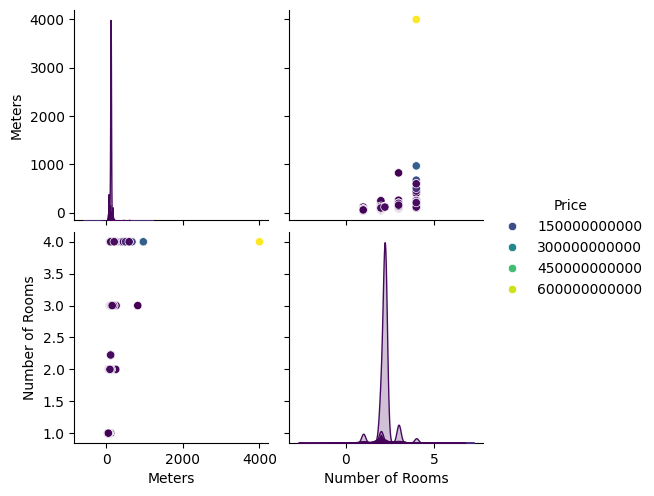

In [14]:
subset = df.iloc[:, 0:8]
sns.pairplot(data=df, hue='Price', palette="viridis")
plt.show()

In [15]:
features = df.drop('Price', axis=1)
y_target = df['Price']

Xtrain, Xtest, ytrain, ytest = train_test_split(features, y_target, test_size=0.3, random_state=42)

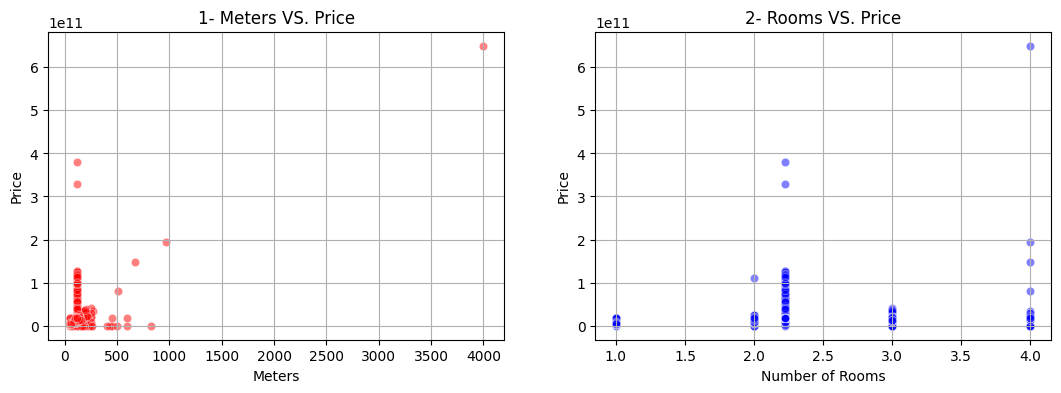

In [16]:
selected_features = df[['Meters', 'Number of Rooms']]
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.scatterplot(x=selected_features.iloc[:, 0], y=y_target, alpha=0.5, color='r')
plt.title("1- Meters VS. Price")
plt.grid()

plt.subplot(1,3,2)
sns.scatterplot(x=selected_features.iloc[:, 1], y=y_target, alpha=0.5, color='b')
plt.title("2- Rooms VS. Price")
plt.grid()

plt.show()

In [17]:
for iter in range(15):  
    # Find the biggest Value
    max_Meters = df['Meters'].max()

    # remove the row
    df = df[df['Meters'] != max_Meters]
    print(df)

             Price      Meters  Number of Rooms
0     1.300000e+10  105.000000         2.000000
1     1.230000e+10   99.000000         2.000000
2     1.895398e+10  117.540453         2.225026
3     7.000000e+10  117.540453         2.225026
4     1.895398e+10  117.540453         2.225026
...            ...         ...              ...
1317  1.170000e+10  130.000000         3.000000
1318  1.260000e+10  140.000000         3.000000
1319  1.895398e+10   98.000000         2.000000
1320  1.250000e+10  158.000000         3.000000
1321  1.895398e+10  117.540453         2.225026

[1321 rows x 3 columns]
             Price      Meters  Number of Rooms
0     1.300000e+10  105.000000         2.000000
1     1.230000e+10   99.000000         2.000000
2     1.895398e+10  117.540453         2.225026
3     7.000000e+10  117.540453         2.225026
4     1.895398e+10  117.540453         2.225026
...            ...         ...              ...
1317  1.170000e+10  130.000000         3.000000
1318  1.260000e

In [18]:
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

df = df[(df['Price'] >= lower_bound_price) & (df['Price'] <= upper_bound_price)]
df

,Price,Meters,Number of Rooms
0,1.300000e+10,105.000000,2.000000
1,1.230000e+10,99.000000,2.000000
2,1.895398e+10,117.540453,2.225026
4,1.895398e+10,117.540453,2.225026
5,9.250000e+09,101.000000,2.000000
...,...,...,...
1317,1.170000e+10,130.000000,3.000000
1318,1.260000e+10,140.000000,3.000000
1319,1.895398e+10,98.000000,2.000000
1320,1.250000e+10,158.000000,3.000000


In [19]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
df[['Price', 'Meters', 'Number of Rooms']] = scaler.fit_transform(df[['Price', 'Meters', 'Number of Rooms']])


In [20]:
features = df.drop('Price', axis=1)
y_target = df['Price']

Xtrain, Xtest, ytrain, ytest = train_test_split(features, y_target, test_size=0.3, random_state=42)

---

# Regression

In [21]:
model = LinearRegression()
# model = make_pipeline(StandardScaler(), LinearRegression())
model

LinearRegression()

In [22]:
model.fit(features, y_target)

LinearRegression()

In [23]:
# calculating coefficients vector
coefficients = model.coef_
intercept = model.intercept_

print('coefficients:\n', coefficients)
print('\nintercept:\n', intercept)

coefficients:
 [ 0.69905491 -0.07675053]

intercept:
 7.660561338046281e-16


In [24]:
# Model Training
model.fit(Xtrain, ytrain)
# Predict
y_pred = model.predict(Xtest)
# calculate the MSE
mse = mean_squared_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.5307941515763885
R-squared: 0.47245515052292253


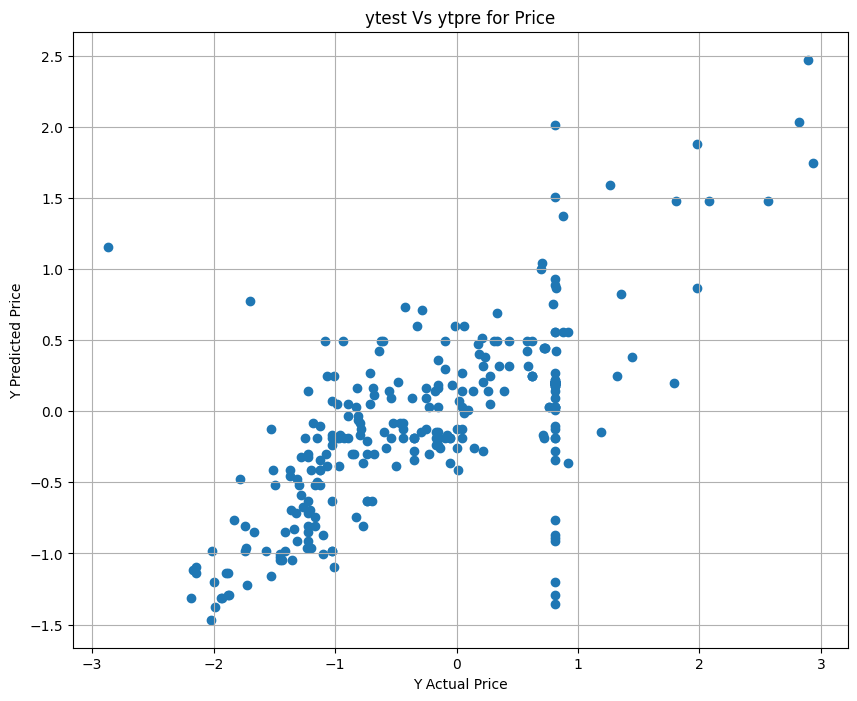

In [25]:
# plot the ytpre & yt
plt.figure(figsize=(10, 8))
plt.scatter(ytest, y_pred)
plt.title("ytest Vs ytpre for Price")
plt.xlabel("Y Actual Price")
plt.ylabel("Y Predicted Price")
plt.grid()
plt.show()

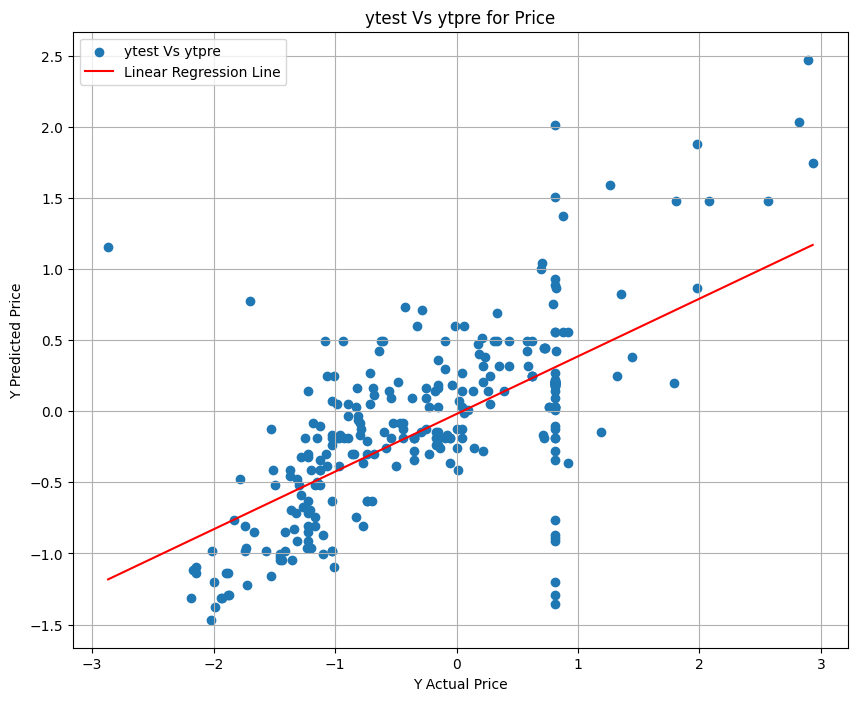

In [26]:
x_range = np.linspace(min(ytest), max(ytest), 100)
# a linear regression line
coefficients = np.polyfit(ytest, y_pred, 1)
linear_reg_line = np.poly1d(coefficients)
y_range = linear_reg_line(x_range)

# Create a scatter plot of the data points
plt.figure(figsize=(10, 8))
plt.scatter(ytest, y_pred, label='ytest Vs ytpre')
plt.plot(x_range, y_range, color='red', label='Linear Regression Line')

plt.title("ytest Vs ytpre for Price")
plt.xlabel("Y Actual Price")
plt.ylabel("Y Predicted Price")
plt.grid()
plt.legend()
plt.show()

# Results after Modifing the Dataset

In [27]:
corr_matrix = df.corr()
corr_matrix

,Price,Meters,Number of Rooms
Price,1.000000,0.638917,0.470995
Meters,0.638917,1.000000,0.783552
Number of Rooms,0.470995,0.783552,1.000000


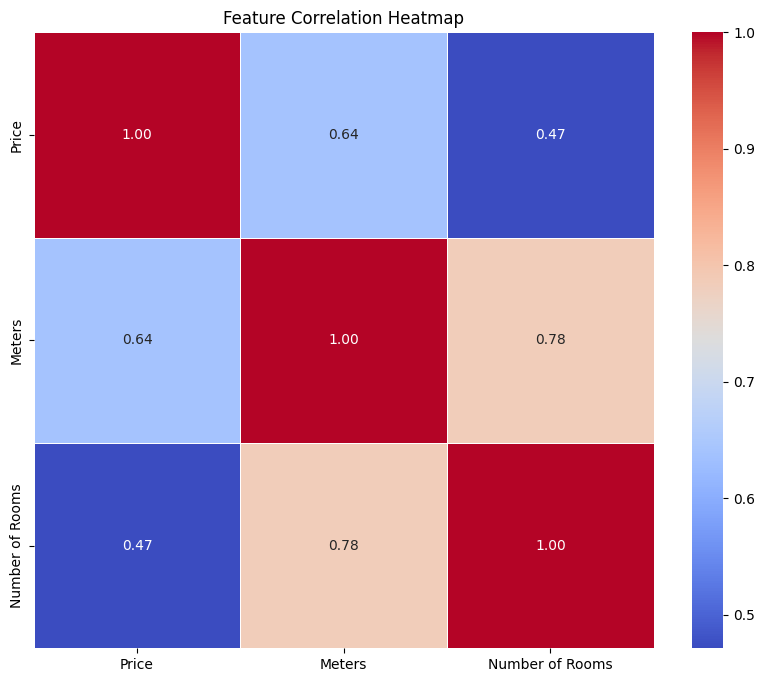

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



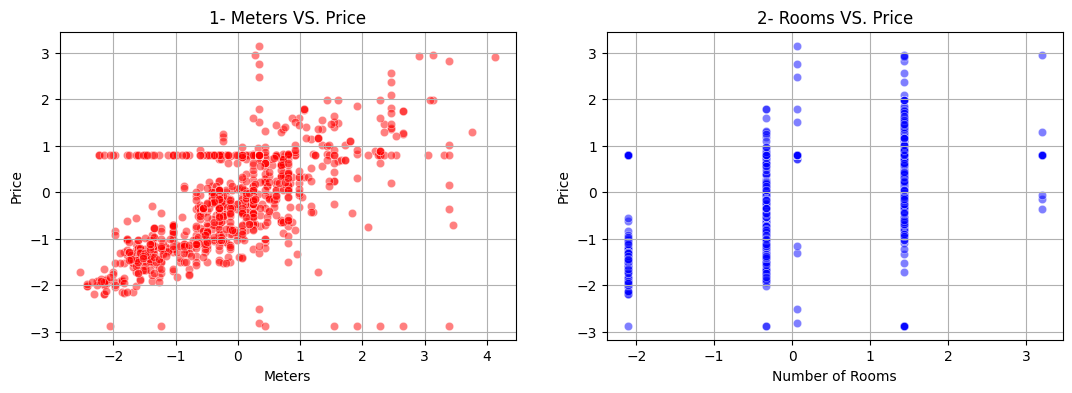

In [29]:
selected_features = df[['Meters', 'Number of Rooms']]
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.scatterplot(x=selected_features.iloc[:, 0], y=y_target, alpha=0.5, color='r')
plt.title("1- Meters VS. Price")
plt.grid()

plt.subplot(1,3,2)
sns.scatterplot(x=selected_features.iloc[:, 1], y=y_target, alpha=0.5, color='b')
plt.title("2- Rooms VS. Price")
plt.grid()

plt.show()

---
# StandardScale Regression

In [30]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
df[['Price', 'Meters', 'Number of Rooms']] = scaler.fit_transform(df[['Price', 'Meters', 'Number of Rooms']])


In [31]:
df

,Price,Meters,Number of Rooms
0,-0.346218,-0.123970,-0.339614
1,-0.482034,-0.345712,-0.339614
2,0.808994,0.339490,0.059492
4,0.808994,0.339490,0.059492
5,-1.073805,-0.271798,-0.339614
...,...,...,...
1317,-0.598448,0.799959,1.433983
1318,-0.423827,1.169530,1.433983
1319,0.808994,-0.382669,-0.339614
1320,-0.443229,1.834759,1.433983


<Axes: >

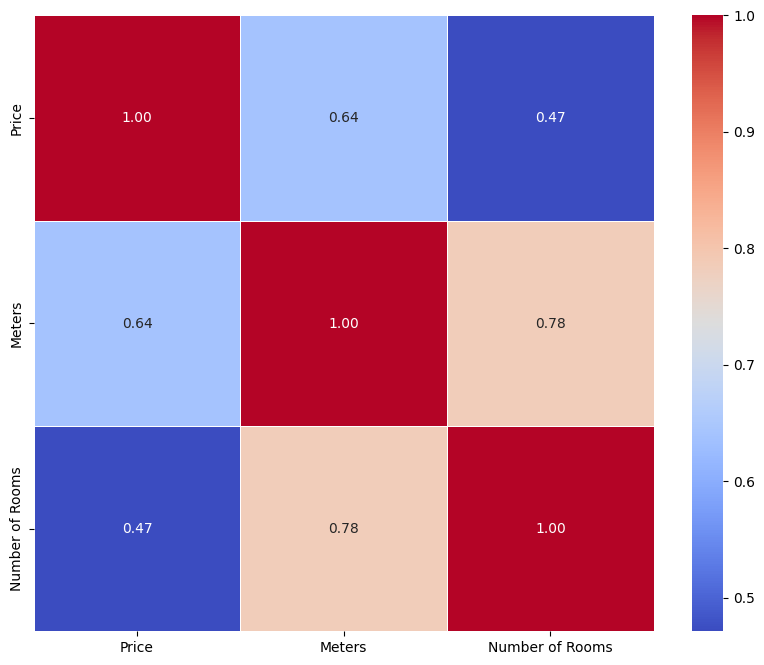

In [32]:
# heatmap of correlation
corr = df.corr()
corr.shape

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [33]:
features = df.drop('Price', axis=1)
y_target = df['Price']

Xtrain, Xtest, ytrain, ytest = train_test_split(features, y_target, test_size=0.3, random_state=42)

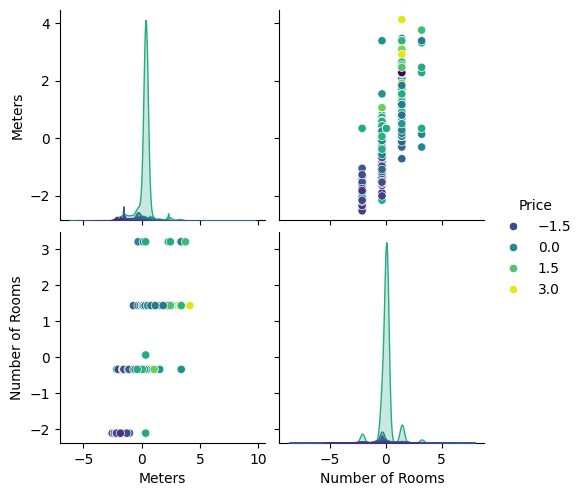

In [34]:
sns.pairplot(data=df, hue='Price', palette="viridis")
plt.show()

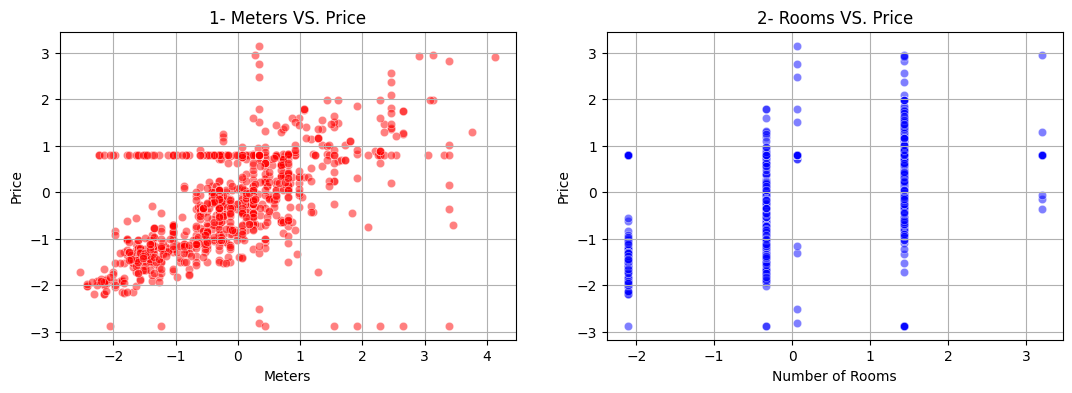

In [35]:
selected_features = df[['Meters', 'Number of Rooms']]
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.scatterplot(x=selected_features.iloc[:, 0], y=y_target, alpha=0.5, color='r')
plt.title("1- Meters VS. Price")
plt.grid()

plt.subplot(1,3,2)
sns.scatterplot(x=selected_features.iloc[:, 1], y=y_target, alpha=0.5, color='b')
plt.title("2- Rooms VS. Price")
plt.grid()

plt.show()

In [36]:
# model = LinearRegression()
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(features, y_target)

# calculating coefficients vector
linear_regression_step = model.named_steps['linearregression']
# Get the coefficients and intercept
coefficients = linear_regression_step.coef_
intercept = linear_regression_step.intercept_

print('coefficients:\n', coefficients)
print('\nintercept:\n', intercept)

coefficients:
 [ 0.69905491 -0.07675053]

intercept:
 1.2663255699982639e-17


In [37]:
# Model Training
model.fit(Xtrain, ytrain)

# calculating Coefficients vector
coefficients = linear_regression_step.coef_
intercept = linear_regression_step.intercept_
print("Coefficients:\n", coefficients)
print("Intercept:", intercept)

# Predict
train_predictions = model.predict(Xtrain)
test_predictions = model.predict(Xtest)

# calculate the MSE
train_mse = mean_squared_error(ytrain, train_predictions)
test_mse = mean_squared_error(ytest, test_predictions)
print("\nTrain MSE:", train_mse)
print("Test MSE:", test_mse)

# calculate the R^2
train_r2 = r2_score(ytrain, train_predictions)
test_r2 = r2_score(ytest, test_predictions)
print("\nTrain R-squared:", train_r2)
print("Test R-squared:", test_r2)

Coefficients:
 [0.6038331  0.01227594]
Intercept: 0.007957587036326147

Train MSE: 0.6207401751526171
Test MSE: 0.5307941515763884

Train R-squared: 0.37748396734723433
Test R-squared: 0.47245515052292264


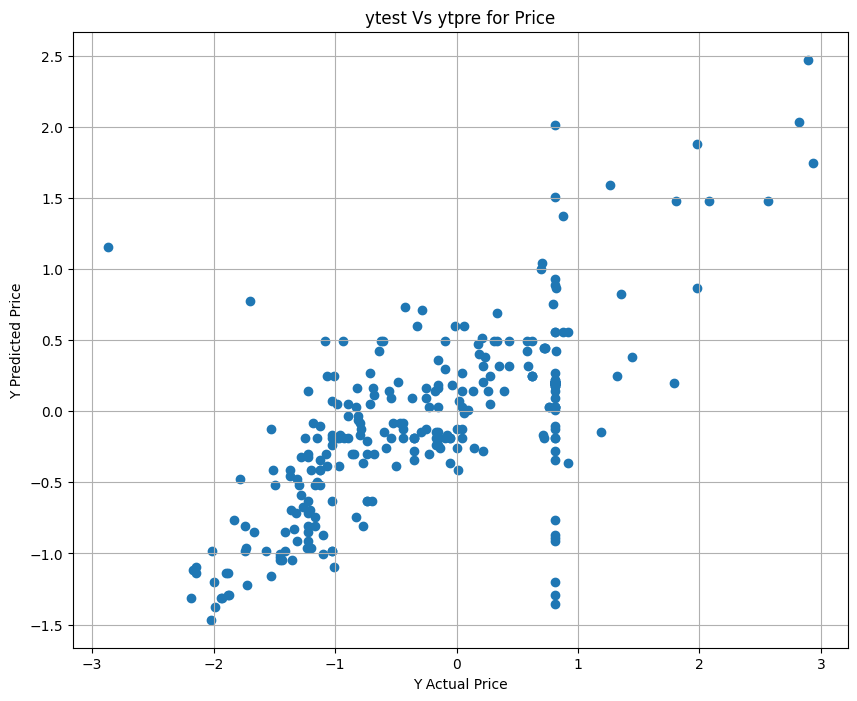

In [38]:
# plot the ytpre & yt
plt.figure(figsize=(10, 8))
plt.scatter(ytest, test_predictions)
plt.title("ytest Vs ytpre for Price")
plt.xlabel("Y Actual Price")
plt.ylabel("Y Predicted Price")
plt.grid()
plt.show()

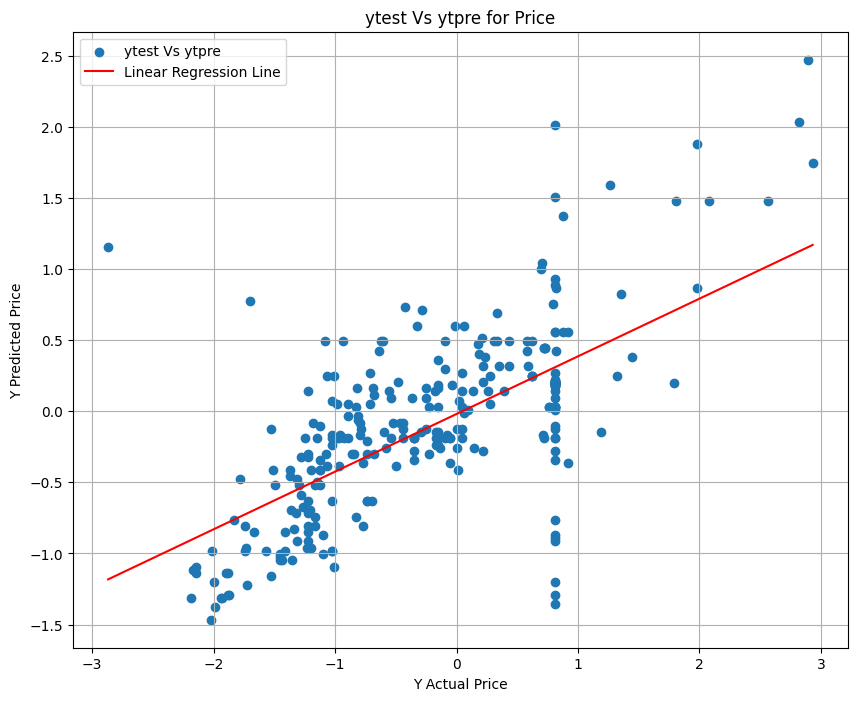

In [39]:
x_range = np.linspace(min(ytest), max(ytest), 100)
# a linear regression line
coefficients = np.polyfit(ytest, test_predictions, 1)
linear_reg_line = np.poly1d(coefficients)
y_range = linear_reg_line(x_range)

# Create a scatter plot of the data points
plt.figure(figsize=(10, 8))
plt.scatter(ytest, test_predictions, label='ytest Vs ytpre')
plt.plot(x_range, y_range, color='red', label='Linear Regression Line')

plt.title("ytest Vs ytpre for Price")
plt.xlabel("Y Actual Price")
plt.ylabel("Y Predicted Price")
plt.grid()
plt.legend()
plt.show()